In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'DryBeanDataSet.xlsx'
df = pd.read_excel(file_path)
df.replace('?', pd.NA, inplace=True)

In [3]:
# Separate categorical and numerical features
categorical_df = df.select_dtypes(include=['object'])  # Assuming categorical variables are of type 'object'
numerical_df = df.select_dtypes(exclude=['object'])

# Display the first few rows of each dataframe
print("Categorical DataFrame:")
print(categorical_df.head())

print("\nNumerical DataFrame:")
print(numerical_df.head())

Categorical DataFrame:
  Colour    Extent Compactness ShapeFactor6     Class
0  brown  0.767184    0.746266    50.809833      CALI
1  black  0.757739     0.82765   148.508874  DERMASON
2  green  0.790885    0.898611    82.107117     SEKER
3  brown  0.761092    0.782734   147.347735    BOMBAY
4  brown  0.721543     0.80264    22.893826      SIRA

Numerical DataFrame:
     Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0   84648   1132.054       439.915710       248.961941      1.767000   
1   39704    736.873       271.659919       186.481404      1.456767   
2   35835    687.914       237.704180       192.176759      1.236904   
3  223035   1817.278       680.812555       419.994347      1.621004   
4   41957    767.143       287.962974       186.166695      1.546802   

   Eccentricity  ConvexArea  Constantness  EquivDiameter  Solidity  roundness  \
0      0.824453       86779             1     328.294351  0.975443   0.830027   
1      0.727175       40106         

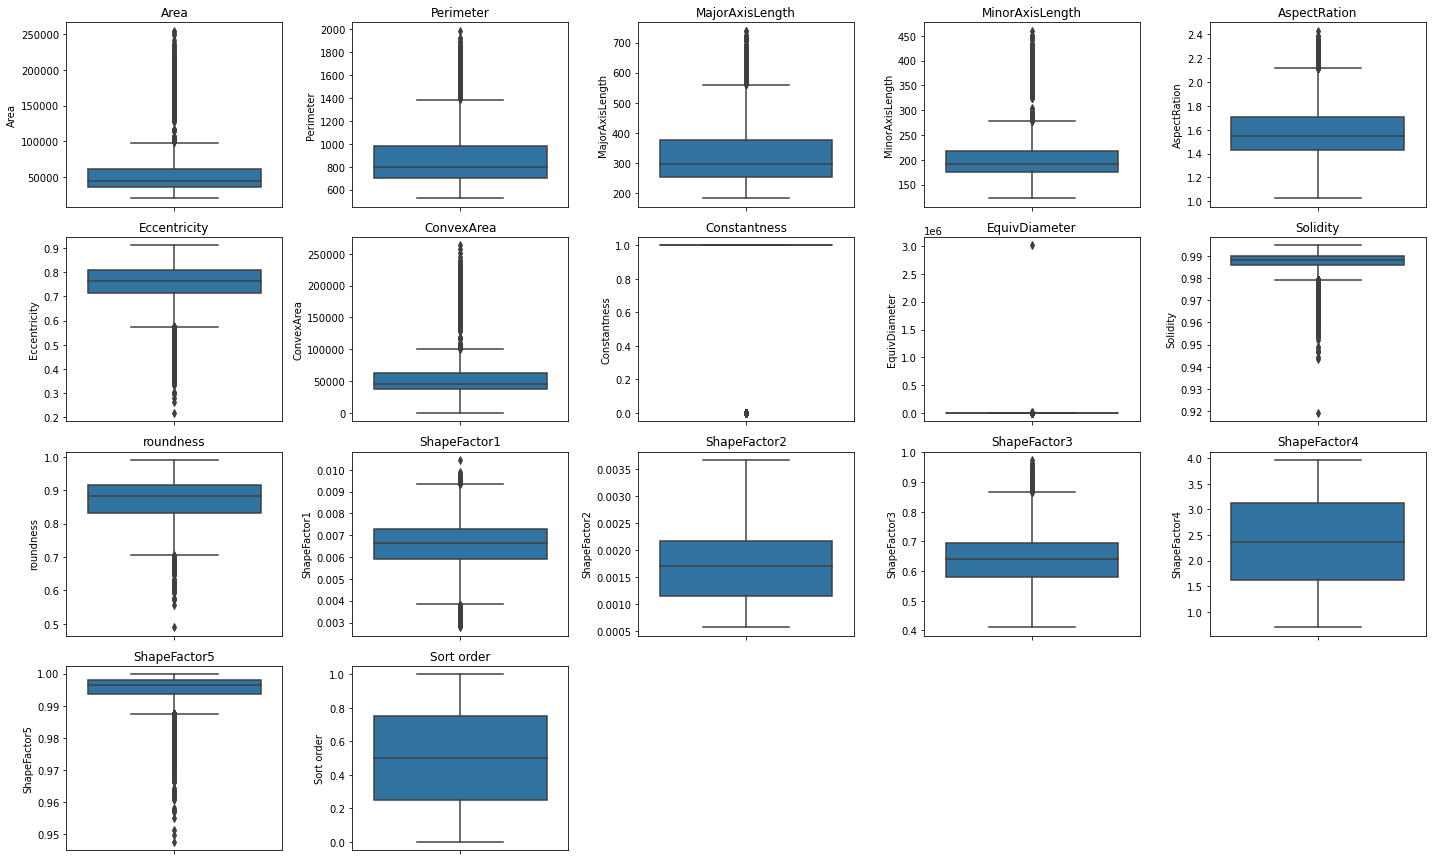

In [4]:

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Generate box plots for each feature
for i, column in enumerate(numerical_df.columns):
    plt.subplot(5, 5, i + 1)  # Adjust the number of rows and columns according to your data
    sns.boxplot(data=numerical_df, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

In [5]:
print("Value counts for 'Colour':")
print(categorical_df['Colour'].value_counts())
print("\n")

print("Value counts for 'Class':")
print(categorical_df['Class'].value_counts())


Value counts for 'Colour':
brown    6115
black    3541
green    2023
white    1926
Name: Colour, dtype: int64


Value counts for 'Class':
DERMASON    3542
SIRA        2634
SEKER       2025
HOROZ       1927
CALI        1628
BARBUNYA    1317
BOMBAY       521
Name: Class, dtype: int64


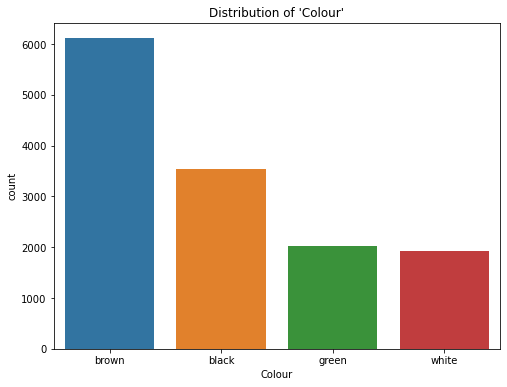

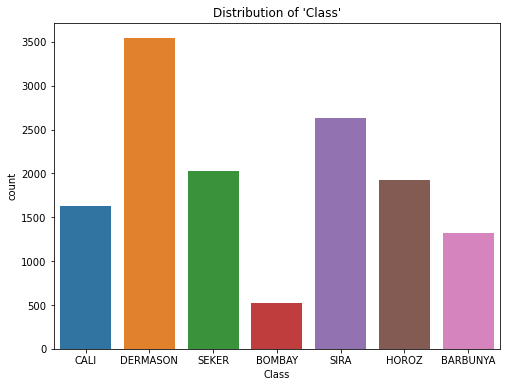

In [6]:
# Distribution of "Colour"
plt.figure(figsize=(8, 6))
sns.countplot(data=categorical_df, x='Colour')
plt.title("Distribution of 'Colour'")
plt.show()

# Distribution of "Class"
plt.figure(figsize=(8, 6))
sns.countplot(data=categorical_df, x='Class')
plt.title("Distribution of 'Class'")
plt.show()


In [7]:
# Continuous Features Summary
continuous_summary = df.describe().T
continuous_summary['% Miss.'] = df.isnull().mean() * 100
continuous_summary['Card.'] = df.nunique()
continuous_summary['1st Qrt.'] = df.quantile(0.25)
continuous_summary['3rd Qrt.'] = df.quantile(0.75)

continuous_summary = continuous_summary[['count', '% Miss.', 'Card.', 'min', '1st Qrt.', 'mean', '50%', '3rd Qrt.', 'max', 'std']]
continuous_summary.columns = ['Count', '% Miss.', 'Card.', 'Min.', '1st Qrt.', 'Mean', 'Median', '3rd Qrt.', 'Max.', 'Std. Dev.']

# Categorical Features Summary
categorical_features = df.select_dtypes(include=['object'])
categorical_summary = categorical_features.describe().T
categorical_summary['% Miss.'] = categorical_features.isnull().mean() * 100
categorical_summary['Mode Freq.'] = categorical_features.apply(lambda x: x.value_counts().iloc[0])
categorical_summary['Mode %'] = categorical_summary['Mode Freq.'] / categorical_summary['count'] * 100
categorical_summary['2nd Mode'] = categorical_features.apply(lambda x: x.value_counts().index[1] if len(x.value_counts()) > 1 else None)
categorical_summary['2nd Mode Freq.'] = categorical_features.apply(lambda x: x.value_counts().iloc[1] if len(x.value_counts()) > 1 else None)
categorical_summary['2nd Mode %'] = categorical_summary['2nd Mode Freq.'] / categorical_summary['count'] * 100

categorical_summary = categorical_summary[['count', '% Miss.', 'unique', 'top', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %']]
categorical_summary.columns = ['Count', '% Miss.', 'Card.', 'Mode', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %']

# Display summaries
print("Continuous Features Summary")
print(continuous_summary)

print("\nCategorical Features Summary")
print(categorical_summary)

Continuous Features Summary
                   Count  % Miss.  Card.          Min.      1st Qrt.  \
Area             13611.0      0.0  12011  20420.000000  36328.000000   
Perimeter        13611.0      0.0  13351    524.736000    703.523500   
MajorAxisLength  13611.0      0.0  13543    183.601165    253.303633   
MinorAxisLength  13611.0      0.0  13543    122.512653    175.848170   
AspectRation     13611.0      0.0  13543      1.024868      1.432307   
Eccentricity     13611.0      0.0  13543      0.218951      0.715928   
ConvexArea       13611.0      0.0  12066    -30.000000  36714.500000   
Constantness     13611.0      0.0      2      0.000000      1.000000   
EquivDiameter    13611.0      0.0  12012      0.161417    215.068003   
Solidity         13611.0      0.0  13526      0.919246      0.985670   
roundness        13611.0      0.0  13543      0.489618      0.832096   
ShapeFactor1     13611.0      0.0  13543      0.002778      0.005900   
ShapeFactor2     13611.0      0.0  1

In [15]:

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize dictionaries to store discrete and continuous features
discrete_features = []
continuous_features = []

# Determine if a feature is discrete or continuous
for feature in numerical_features:
    unique_values = df[feature].nunique()
    if unique_values < 1000:  # Arbitrary threshold; you can adjust based on domain knowledge
        discrete_features.append(feature)
    else:
        continuous_features.append(feature)

# Print the results
print("Discrete Features:", discrete_features)
print("Continuous Features:", continuous_features)

Discrete Features: ['Constantness']
Continuous Features: ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Solidity', 'roundness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'ShapeFactor5', 'Sort order']


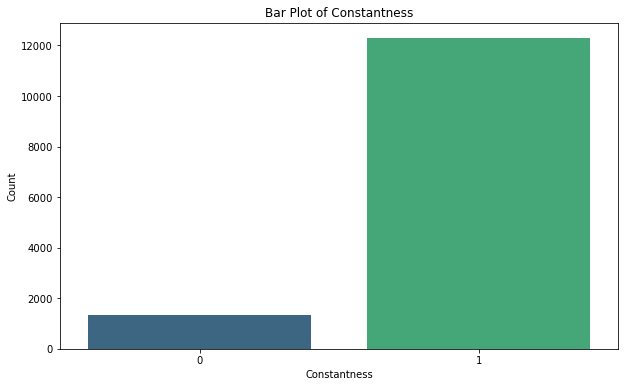

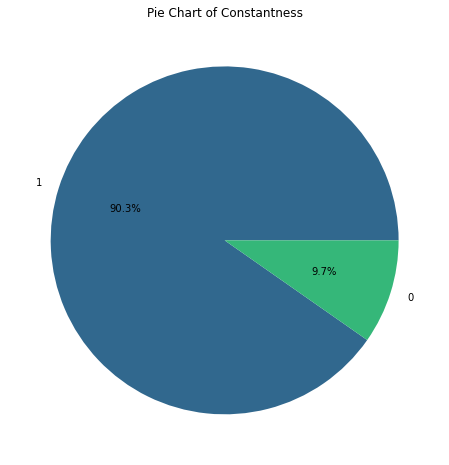

In [14]:
# Drop missing values for visualization
df = df.dropna(subset=['Constantness'])

# Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Constantness', data=df, palette='viridis')
plt.title('Bar Plot of Constantness')
plt.xlabel('Constantness')
plt.ylabel('Count')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
df['Constantness'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis', len(df['Constantness'].unique())))
plt.title('Pie Chart of Constantness')
plt.ylabel('')  # Remove y-label to keep the chart clean
plt.show()

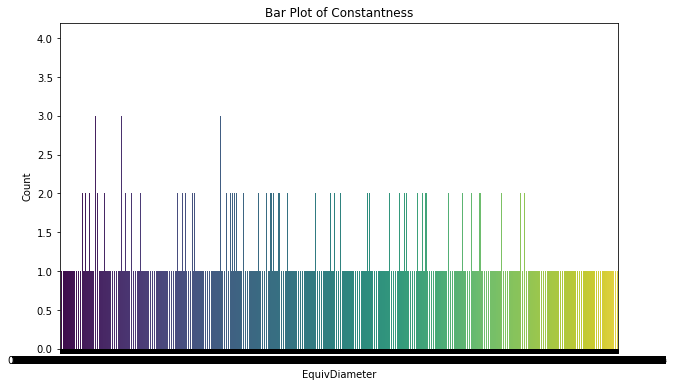

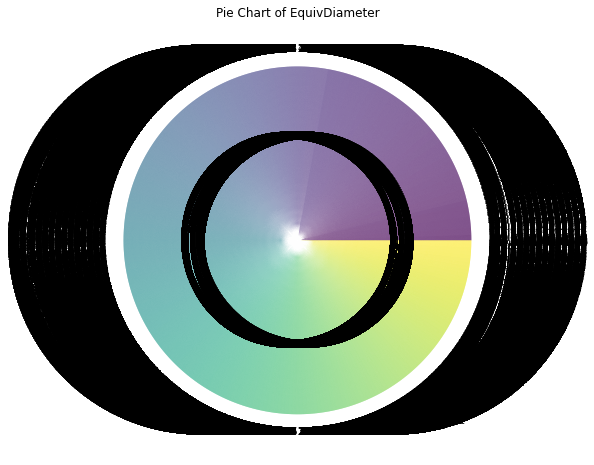

TypeError: Vertical orientation requires numeric `y` variable.

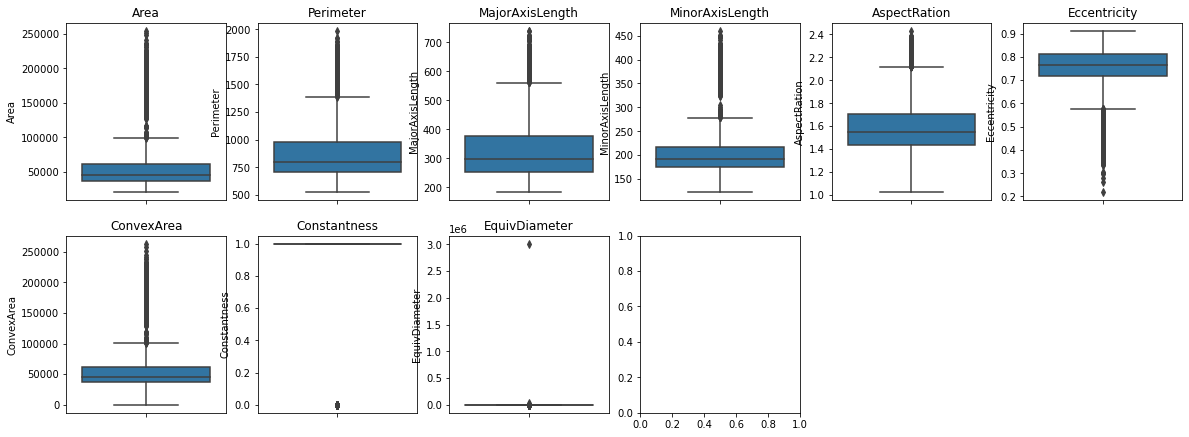

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Assuming you have already loaded your DryBeansDataSet into a DataFrame called df
# df = pd.read_csv('DryBeansDataSet.csv')
file_path = 'DryBeanDataSet.xlsx'
df = pd.read_excel(file_path)
df.replace('?', pd.NA, inplace=True)

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Loop through each feature to create a boxplot
for i, column in enumerate(df.columns[:-1]):  # Exclude the target column
    plt.subplot(4, 6, i + 1)  # Adjust subplot grid size according to the number of features
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [2]:
df.shape

(13611, 22)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   Constantness     13611 non-null  int64  
 8   EquivDiameter    13611 non-null  float64
 9   Colour           13605 non-null  object 
 10  Extent           13605 non-null  object 
 11  Solidity         13611 non-null  float64
 12  roundness        13611 non-null  float64
 13  Compactness      13593 non-null  object 
 14  ShapeFactor1     13611 non-null  float64
 15  ShapeFactor2     13611 non-null  float64
 16  ShapeFactor3     13611 non-null  float64
 17  ShapeFactor4

In [4]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Solidity,roundness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,Sort order
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,1.361100e+04,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53765.692602,0.902873,4.762541e+02,0.987143,0.873282,0.006564,0.001716,0.643590,2.368097,0.995063,0.500271
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29778.009358,0.296142,2.583687e+04,0.004660,0.059520,0.001128,0.000596,0.098996,0.871619,0.004366,0.287926
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,-30.000000,0.000000,1.614174e-01,0.919246,0.489618,0.002778,0.000564,0.410339,0.695579,0.947687,0.000089
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,1.000000,2.150680e+02,0.985670,0.832096,0.005900,0.001154,0.581359,1.614151,0.993703,0.248187
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,1.000000,2.384380e+02,0.988283,0.883157,0.006645,0.001694,0.642044,2.368757,0.996386,0.503810
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,1.000000,2.794522e+02,0.990013,0.916869,0.007271,0.002170,0.696006,3.115695,0.997883,0.750096
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,1.000000,3.014441e+06,0.994677,0.990685,0.010451,0.003665,0.974767,3.966119,0.999733,0.999985


In [5]:
# Summarize only categorical (object) columns
categorical_summary = df.describe(include=['object'])

# Display the summary
print(categorical_summary)

       Colour        Extent   Compactness  ShapeFactor6     Class
count   13605  13605.000000  13593.000000  13606.000000     13594
unique      4  13529.000000  13525.000000  13606.000000         7
top     brown      0.777909      0.704282     50.809833  DERMASON
freq     6115      2.000000      2.000000      1.000000      3542


In [6]:
#Constantness, Colour, Class, 

In [14]:
import pandas as pd
import numpy as np

# List of all features
all_features = [
    'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 
    'Eccentricity', 'ConvexArea', 'Constantness', 'EquivDiameter', 'Colour', 
    'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 
    'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'ShapeFactor5', 
    'ShapeFactor6', 'Class', 'Sort order'
]

# Exclude the categorical features
categorical_features = ['Constantness', 'Colour', 'Class']
continuous_features = [feature for feature in all_features if feature not in categorical_features]

# Initialize an empty dictionary to hold the summary statistics
summary_stats = {
    'Feature': [],
    'Count': [],
    '% Miss.': [],
    'Card.': [],
    'Min.': [],
    '1st Qrt.': [],
    'Mean': [],
    'Median': [],
    '3rd Qrt.': [],
    'Max.': [],
    'Std. Dev.': []
}

# Calculate summary statistics manually
for feature in continuous_features:
    # Drop missing values for calculations
    feature_data = df[feature].dropna()
    
    # Calculate statistics
    count = len(feature_data)
    missing_percentage = df[feature].isnull().mean() * 100
    cardinality = df[feature].nunique()
    min_value = feature_data.min()
    q1 = feature_data.quantile(0.25)
    mean_value = feature_data.mean()
    median_value = feature_data.median()
    q3 = feature_data.quantile(0.75)
    max_value = feature_data.max()
    std_dev = feature_data.std()
    
    # Append to the summary_stats dictionary
    summary_stats['Feature'].append(feature)
    summary_stats['Count'].append(count)
    summary_stats['% Miss.'].append(missing_percentage)
    summary_stats['Card.'].append(cardinality)
    summary_stats['Min.'].append(min_value)
    summary_stats['1st Qrt.'].append(q1)
    summary_stats['Mean'].append(mean_value)
    summary_stats['Median'].append(median_value)
    summary_stats['3rd Qrt.'].append(q3)
    summary_stats['Max.'].append(max_value)
    summary_stats['Std. Dev.'].append(std_dev)

# Convert the dictionary to a DataFrame
summary_df = pd.DataFrame(summary_stats)

# Display the summary statistics
print(summary_df)


            Feature  Count   % Miss.  Card.          Min.      1st Qrt.  \
0              Area  13611  0.000000  12011  20420.000000  36328.000000   
1         Perimeter  13611  0.000000  13351    524.736000    703.523500   
2   MajorAxisLength  13611  0.000000  13543    183.601165    253.303633   
3   MinorAxisLength  13611  0.000000  13543    122.512653    175.848170   
4      AspectRation  13611  0.000000  13543      1.024868      1.432307   
5      Eccentricity  13611  0.000000  13543      0.218951      0.715928   
6        ConvexArea  13611  0.000000  12066    -30.000000  36714.500000   
7     EquivDiameter  13611  0.000000  12012      0.161417    215.068003   
8            Extent  13605  0.044082  13529      0.555315      0.718641   
9          Solidity  13611  0.000000  13526      0.919246      0.985670   
10        roundness  13611  0.000000  13543      0.489618      0.832096   
11      Compactness  13593  0.132246  13525      0.640577      0.762577   
12     ShapeFactor1  1361

In [13]:
len(continuous_features)

19

In [17]:
# Initialize an empty dictionary to hold the summary statistics for categorical features
categorical_summary_stats = {
    'Feature': [],
    'Count': [],
    '% Miss.': [],
    'Card.': [],
    'Mode': [],
    'Mode Freq.': [],
    'Mode %': [],
    '2nd Mode': [],
    '2nd Mode Freq.': [],
    '2nd Mode %': []
}

# Calculate summary statistics for each categorical feature
for feature in categorical_features:
    # Drop missing values for calculations
    feature_data = df[feature].dropna()
    
    # Calculate statistics
    count = len(feature_data)
    missing_percentage = df[feature].isnull().mean() * 100
    cardinality = df[feature].nunique()
    mode_value = feature_data.mode().iloc[0]  # Most frequent value (mode)
    mode_freq = feature_data.value_counts().iloc[0]  # Frequency of the mode
    mode_percentage = (mode_freq / count) * 100  # Percentage of the mode
    if len(feature_data.value_counts()) > 1:
        second_mode_value = feature_data.value_counts().index[1]  # Second most frequent value
        second_mode_freq = feature_data.value_counts().iloc[1]  # Frequency of the second mode
        second_mode_percentage = (second_mode_freq / count) * 100  # Percentage of the second mode
    else:
        second_mode_value = np.nan
        second_mode_freq = np.nan
        second_mode_percentage = np.nan
    
    # Append to the categorical_summary_stats dictionary
    categorical_summary_stats['Feature'].append(feature)
    categorical_summary_stats['Count'].append(count)
    categorical_summary_stats['% Miss.'].append(missing_percentage)
    categorical_summary_stats['Card.'].append(cardinality)
    categorical_summary_stats['Mode'].append(mode_value)
    categorical_summary_stats['Mode Freq.'].append(mode_freq)
    categorical_summary_stats['Mode %'].append(mode_percentage)
    categorical_summary_stats['2nd Mode'].append(second_mode_value)
    categorical_summary_stats['2nd Mode Freq.'].append(second_mode_freq)
    categorical_summary_stats['2nd Mode %'].append(second_mode_percentage)

# Convert the dictionary to a DataFrame
categorical_summary_df = pd.DataFrame(categorical_summary_stats)

# Display the summary statistics for categorical features
print(categorical_summary_df)


        Feature  Count   % Miss.  Card.      Mode  Mode Freq.     Mode %  \
0  Constantness  13611  0.000000      2         1       12289  90.287268   
1        Colour  13605  0.044082      4     brown        6115  44.946711   
2         Class  13594  0.124899      7  DERMASON        3542  26.055613   

  2nd Mode  2nd Mode Freq.  2nd Mode %  
0        0            1322    9.712732  
1    black            3541   26.027196  
2     SIRA            2634   19.376195  
